<a href="https://colab.research.google.com/github/maren318/MAT421_Fenglin/blob/main/MAT421_ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Numerical Differentiation Problem Statement

Numerical Grid - An evenly spaced set of points over the domain of a function over an interval.

Spacing (Step Size) - Distance between adjacent points on a numerical grid

The Function is Only Known Discretely: In many practical applications in engineering and science, a function $f(x)$ might not be known analytically but is observed or measured at discrete points.

Python offers several tools for generating numerical grids, such as the linspace function from NumPy


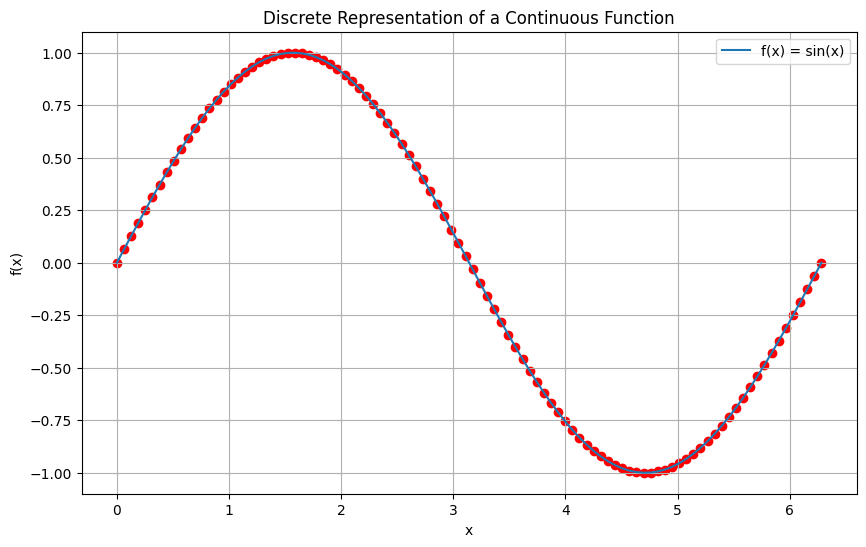

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = sin(x) for demonstration
f = np.sin
x = np.linspace(0, 2 * np.pi, 100)
y = f(x)

# Plotting the function over the numerical grid
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = sin(x)')
plt.scatter(x, y, color='red')  # Mark the discrete points
plt.title('Discrete Representation of a Continuous Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


### Finite Difference Approximating Derivatives

The derivative $f'(x)$ of a function $f(x)$ at the point $x = a$ is defined as: $f'(a)=lim_{x→a} \frac{f(x)-f(a)}{x-a}$. The derivative at $x=a$ is the slope at this point. In finite difference approximations of this slope, we can use values of the function in the neighborhood of the point $x=a$ to achieve the goal.

The forward difference is to estimate the slope of the function at $x_j$
 using the line that connects $(x_j,f(x_j))$ and $(x_j+1,f(x_j+1))$: $f'(x_j)=\frac{f(x_j+1)-f(x_j)}{x_{j+1}-x_j}$

The backward difference is to estimate the slope of the function at $x_j$ using the line that connects $(x_{j-1},f(x_{j-1}))$ and $(x_j,f(x_j))$: $f'(x_j)=\frac{f(x_j)-f(x_{j-1})}{x_{j}-x_{j-1}}$

The central difference is to estimate the slope of the function at $x_j$ using the line that connects $(x_{j-1},f(x_{j-1}))$ and $(x_{j+1},f(x_{j+1}))$
: $f'(x_j)=\frac{f(x_j+1)-f(x_{j-1}}{x_{j+1}-x_{j-1}}$

To derive an approximation for the derivative of $f$, we return to Taylor series. For an arbitrary function $f(x)$ the Taylor series of $f$ around $a=x_j$ is $f(x)=\frac{f(x_j)(x-x_j)^0}{0!}+\frac{f'(x_j)(x-x_j)^1}{1!}+\frac{f''(x_j)(x-x_j)^2}{2!}+\frac{f'''(x_j)(x-x_j)^3}{3!}+⋯.$

If $x$ is on a grid of points with spacing $h$:

the forward difference formula for approximating derivatives as

$f'(x_j)≈\frac{f(x_{j+1})-f(x_j)}{h}$,

he backward difference formula

$f'(x_j)≈\frac{f(x_{j})-f(x_{j-1})}{h}$,

the central difference formula

$f'(x_j)≈\frac{f(x_{j+1})-f(x_{j-1})}{2h}$.

<ipython-input-3-f2d5b16a94cd>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


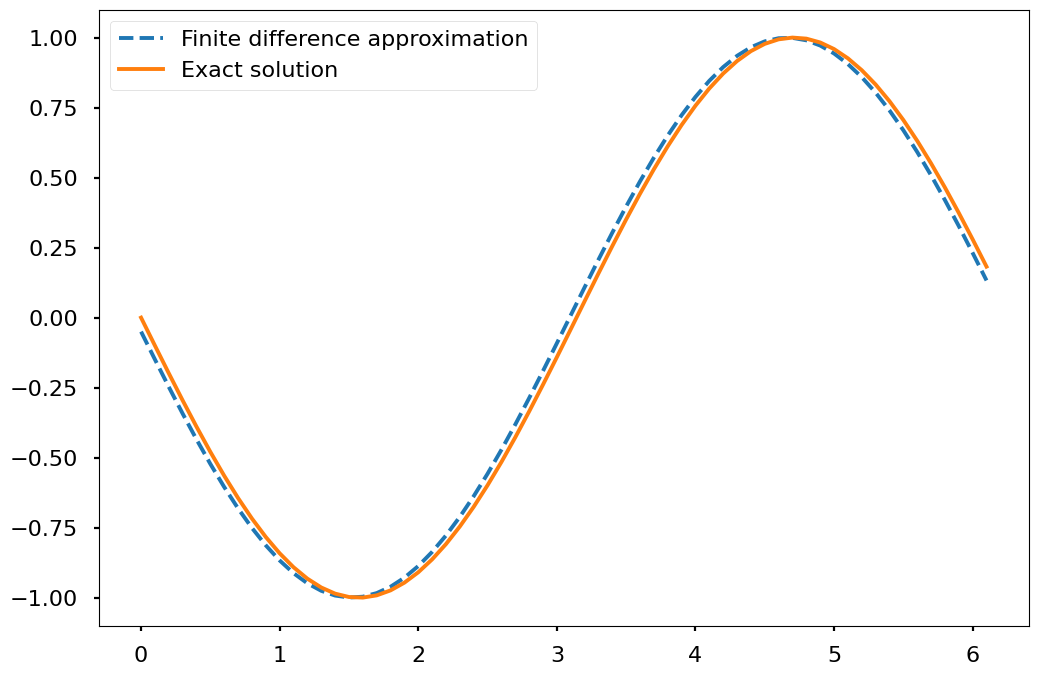

0.049984407218554114


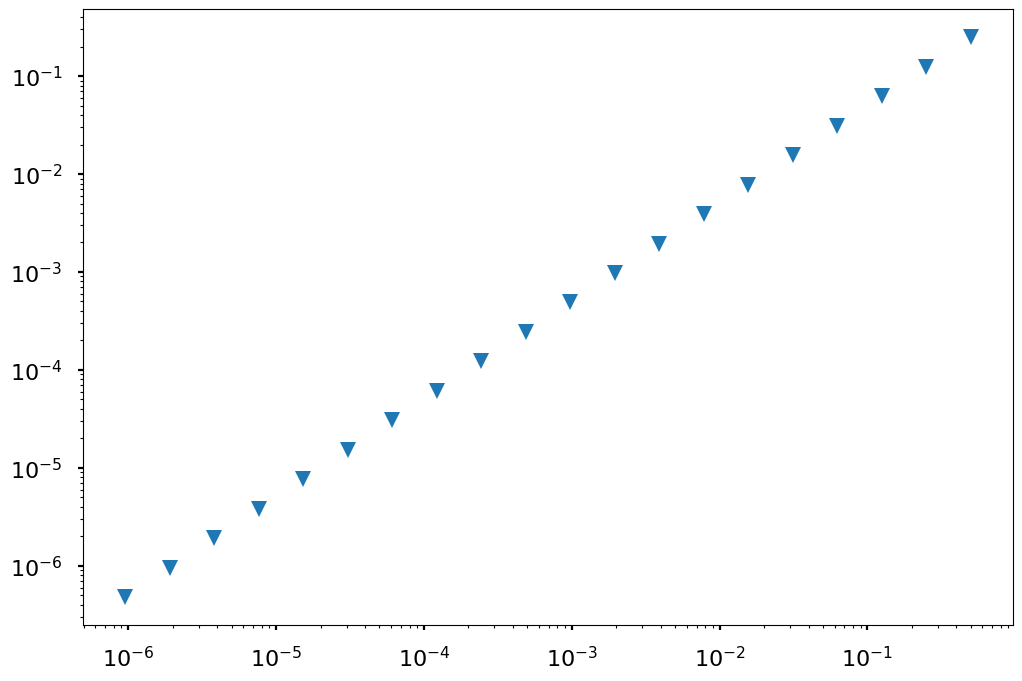

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h)
# compute function
y = np.cos(x)

# compute vector of forward differences
forward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1:]
# compute exact solution
exact_solution = -np.sin(x_diff)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)


# define step size
h = 1
# define number of iterations to perform
iterations = 20
# list to store our step sizes
step_size = []
# list to store max error for each step size
max_error = []

for i in range(iterations):
    # halve the step size
    h /= 2
    # store this step size
    step_size.append(h)
    # compute new grid
    x = np.arange(0, 2 * np.pi, h)
    # compute function value at grid
    y = np.cos(x)
    # compute vector of forward differences
    forward_diff = np.diff(y)/h
    # compute corresponding grid
    x_diff = x[:-1]
    # compute exact solution
    exact_solution = -np.sin(x_diff)

    # Compute max error between
    # numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

### Approximating of Higher Order Derivatives

It also possible to use Taylor series to approximate higher order derivatives (e.g., $f''(x_j)$,$f'''(x_j)$, etc.). For example, taking the Taylor series around $a=x_j$ and then computing it at $x=x_{j-1}$ and $x_{j+1}$ gives $f(x_{j-1})=f(x_j)-hf'(x_j)+\frac{h^2f''(x_j)}{2}-\frac{h^3f'''(x_j)}{6}+⋯$ and $f(x_{j+1})=f(x_j)+hf'(x_j)+\frac{h^2f''(x_j)}{2}+\frac{h^3f'''(x_j)}{6}+⋯$. If we add these two equations together, we get $f(x_{j-1})+f(x_{j+1})=2f(x_j)+h^2f''(x_j)+\frac{h^4f''''(x_j)}{24}+⋯$, and with some rearrangement gives the approximation $f''(x_j)≈\frac{f(x_{j+1})-2f(x_j)+f(x_{j-1})}{h^2}$, and is $O(h^2)$

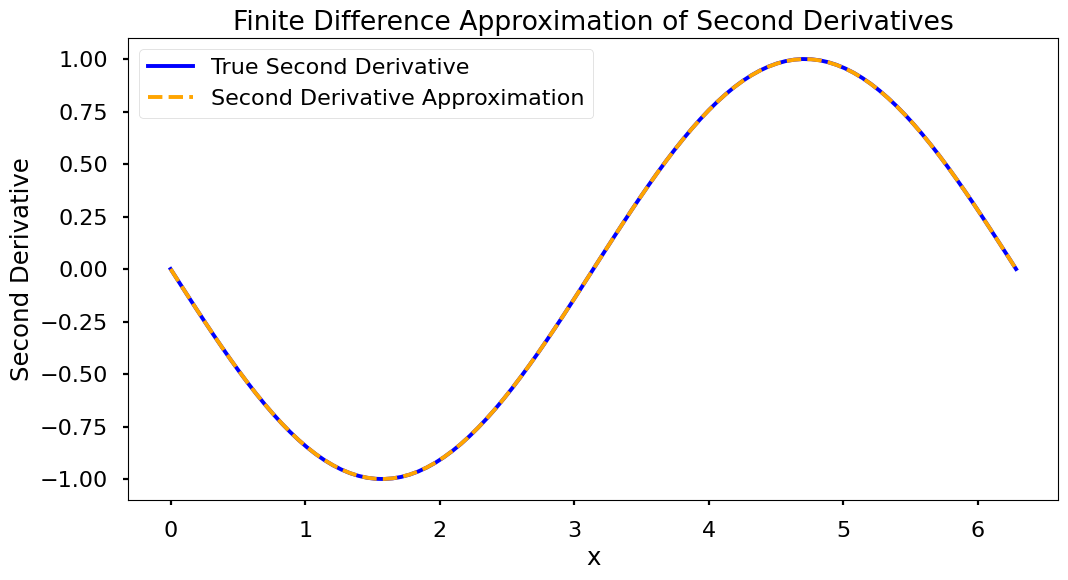

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Re-define the function and its second derivative for demonstration
f = lambda x: np.sin(x)  # f(x) = sin(x)
ddf = lambda x: -np.sin(x)  # f''(x) = -sin(x), the second derivative

# Create a numerical grid
x = np.linspace(0, 2 * np.pi, 100)
h = x[1] - x[0]  # Grid spacing

# Compute the second derivative using the finite difference approximation
second_derivative_approx = (f(x + h) - 2 * f(x) + f(x - h)) / h**2

# Plot the function's second derivative
plt.figure(figsize=(12, 6))
plt.plot(x, ddf(x), label='True Second Derivative', color='blue')
plt.plot(x, second_derivative_approx, '--', label='Second Derivative Approximation', color='orange')
plt.xlabel('x')
plt.ylabel('Second Derivative')
plt.legend()
plt.title('Finite Difference Approximation of Second Derivatives')
plt.show()
